# Telco Customer Churn : DEA
### Author : Indra Yanto

## 0. Setting the Work Environment

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as numpy
%config InlineBackend.figure_format = 'svg'

## 1. Data Profiling and Summarizing

This Telco Customer Churn dataset is downloaded from Kaggle (link https://www.kaggle.com/blastchar/telco-customer-churn). By accurately predicting the customer's 'Churn' behaviour, we can help the corresponding company retains their customer.

In [2]:
df=pd.read_csv('D:\\Learning_python\\Tchurn.csv')
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [3]:
row_n,col_n=df.shape
print(f'Datasets consist of {row_n} rows and {col_n} columns')

Datasets consist of 7043 rows and 21 columns


### 1.1  Describing each feature

 Let's describe each feature shortly:
- **CustomerID** : Represents Unique Id Number of each customer (Need to be dropped!)
- **gender** : Categorical data, represents the customer gender
- **SeniorCitizen** : Categorical data, identifies whether the customer is a senior citizen or not (1, 0) *Has been encoded
- **Partner** : Categorical data, identifies whether the customer has a partner or not (Yes, No)
- **Dependents** : Categorical data, identifies whether the customer has dependents or not (Yes, No)
- **tenure** : Number of months the customer has stayed with the company
- **PhoneService** : Whether the customer has a phone service or not (Yes, No)
- **MultipleLines** : Whether the customer has multiple lines or not (Yes, No, No phone service)
- **InternetService** : Customer’s internet service provider (DSL, Fiber optic, No)
- **OnlineSecurity** : Whether the customer has online security or not (Yes, No, No internet service)
- **OnlineBackup** : Whether the customer has online backup or not (Yes, No, No internet service)
- **DeviceProtection** : Whether the customer has device protection or not (Yes, No, No internet service)
- **TechSupport** : Whether the customer has tech support or not (Yes, No, No internet service)
- **StreamingTV** : Whether the customer has streaming TV or not (Yes, No, No internet service)
- **StreamingMovies** : Whether the customer has streaming movies or not (Yes, No, No internet service)
- **Contract** : The contract term of the customer (Month-to-month, One year, Two year)
- **PaperlessBilling** : Whether the customer has paperless billing or not (Yes, No)
- **PaymentMethod** : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- **MonthlyCharges** : The amount charged to the customer monthly
- **TotalCharges** : The total amount charged to the customer
- **Churn** : Target variable, define whether the customer churned or not (Yes or No)

### 1.2 Summarizing the Datasets

- The target variable is **Churn**, i.e. customers who left within the last month
- Services consist of phone services, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies 
- The information about customer account consists of tenure, contract, payment method, paperless billing, monthly charges, and total charges
- There are also gender, age range, partners, and dependents to give information about customer demographic

## 2. Data Cleansing and Preparation I

### 2.1 Checking for the data types and missing values

In [4]:
df_desc=df.isna().sum(axis=0).reset_index() # Series will be transformed to Data Frame
df_desc.columns=['Variable','NA_Values']
df_desc['Filling_Values (%)']=(row_n-df_desc['NA_Values'])*100/row_n
df_desc['Dtypes']=df.dtypes.values
df_desc

,Variable,NA_Values,Filling_Values (%),Dtypes
0,customerID,0,100.0,object
1,gender,0,100.0,object
2,SeniorCitizen,0,100.0,int64
3,Partner,0,100.0,object
4,Dependents,0,100.0,object
5,tenure,0,100.0,int64
6,PhoneService,0,100.0,object
7,MultipleLines,0,100.0,object
8,InternetService,0,100.0,object
9,OnlineSecurity,0,100.0,object


Based on above dataframe, it appears that :
- **No missing values detected for all variables**
- **Most of the variables considered as categorical (object) and need to be encoded**
- **Tenure, MonthlyCharges, and TotalCharges are considered numerical. However, there are anomalies in the TotalCharges column as its type showed to be an object**

### 2.2 Converting the object values on TotalCharges column

In [5]:
#df['TotalCharges']=df['TotalCharges'].astype('float64') 
#this command can't be executed because there may some strings which can't be converted

In [6]:
#Check all values of TotalCharges
df.sort_values(by='TotalCharges').head(15)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
6754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No


After sorting the TotalCharges, we can clearly see that the roots of error when converting the datatypes are **' ' characters**. By looking at the tenure columns, we find out that these anomalies may appear because the tenure values is 0 and one month period hasn't been completed yet or maybe there are free trials. Thus, we can replace **' ' characters** with **0 total charges**.

In [7]:
#Clean the TotalCharges column
def clean_total_charges(x):
    try:
        float(x)
    except:
        return float(0)
    else:
        return float(x)
df['TotalCharges']=df['TotalCharges'].apply(lambda x: clean_total_charges(x))

In [8]:
df.sort_values(by='TotalCharges')[['tenure','TotalCharges','Churn']].head(15) #Let's see the edited TotaLCharges columns with the corresponding tenure

,tenure,TotalCharges,Churn
3826,0,0.00,No
5218,0,0.00,No
4380,0,0.00,No
753,0,0.00,No
488,0,0.00,No
1082,0,0.00,No
6754,0,0.00,No
936,0,0.00,No
1340,0,0.00,No
6670,0,0.00,No


The amount of rows that have been imputed is eleven rows. Since it's very small compared to the amount of total rows, i.e 7043, I'm sure that these rows will be deleted in real practices. However, these rows will be kept for now since there won't be any data processing in this work.

In [9]:
# Re-checking for the missing values and variables data types
df_desc=df.isna().sum(axis=0).reset_index() # Series will be transformed to Data Frame
df_desc.columns=['Variable','NA_Values']
df_desc['Filling_Values (%)']=(row_n-df_desc['NA_Values'])*100/row_n
df_desc['Dtypes']=df.dtypes.values
df_desc

,Variable,NA_Values,Filling_Values (%),Dtypes
0,customerID,0,100.0,object
1,gender,0,100.0,object
2,SeniorCitizen,0,100.0,int64
3,Partner,0,100.0,object
4,Dependents,0,100.0,object
5,tenure,0,100.0,int64
6,PhoneService,0,100.0,object
7,MultipleLines,0,100.0,object
8,InternetService,0,100.0,object
9,OnlineSecurity,0,100.0,object


Now the TotalCharges variable is detected as float64 data types

### 2.3 Outlier Checking and Cleaning

Aside from **tenure, MonthlyCharges, and TotalCharges**, all variables are considered categorical. Outlier will be searched by Interquartile range method, hence the boxplot will be used.

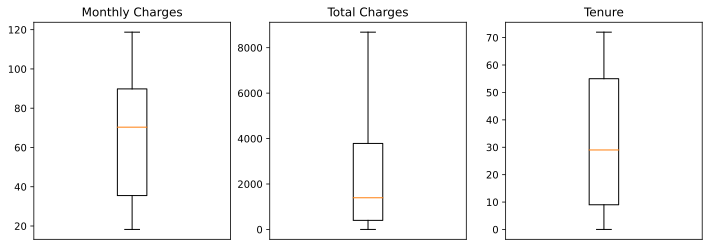

In [10]:
fig,ax=plt.subplots(1,3)
ax[0].boxplot(df.MonthlyCharges)
ax[0].set_title('Monthly Charges')
ax[0].set_xticklabels([])
ax[0].set_xticks([])
ax[1].boxplot(df.TotalCharges)
ax[1].set_title('Total Charges')
ax[1].set_xticklabels([])
ax[1].set_xticks([])
ax[2].boxplot(df.tenure)
ax[2].set_title('Tenure')
ax[2].set_xticklabels([])
ax[2].set_xticks([])
fig.set_size_inches(12,4) 
plt.show()

**No outlier and anomalies** found in all numerical variables such as MonthlyCharges, TotalCharges, and tenure.

### 2.4 Drop the customerID column

The customerID column is need to be dropped because it can't be processed by ML algorithm and also do not give us any explanation about the data

In [11]:
df.drop('customerID',axis=1,inplace=True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


### 2.5 Target Variable Encoding

The final step on this first Data Cleansing and Preparation process is encoding the Churn variable. As explained before, Churn is the target variable which consists of binary values, Yes and No. These Yes/No values however need to be replaced with 1 or 0 so the data can be explored further and learned by ML algorithm.

In [12]:
df['Churn']=df['Churn'].apply(lambda x:1 if x=='Yes' else 0)

In [13]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


## 3. Exploratory data analysis

After encoding the target variable to 1 and 0 values, we can do DEA to see the behaviour patterns of the customers which yield to Customer Churn.

### 3.1 Customer Demographic : Gender, Age Range, Partners, Dependents

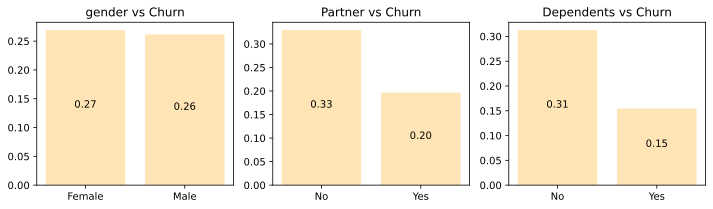

In [14]:
def plot_bar_categories(list_input):
    fig,ax = plt.subplots(1,len(list_input))
    for i,x in enumerate(list_input):
        seriess=df.groupby(by=x).Churn.mean() #mean : probability to churn
        xx=[j for j in range(len(seriess.index))]
        yy=[j for j in seriess.values]
        ax[i].bar(seriess.index,seriess.values,color='moccasin')
        ax[i].set_title(f'{x} vs Churn')
        for xx,yy in zip(xx,yy):
            label = "{:.2f}".format(yy)
            ax[i].annotate(label,(xx,yy*0.5),ha='center')
    fig.set_size_inches(4*len(list_input),3)
    fig.set_dpi(50)
plot_bar_categories(['gender','Partner','Dependents'])

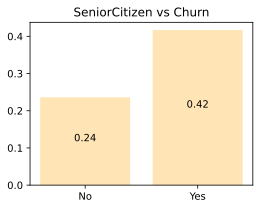

In [15]:
seriess=df.groupby(by='SeniorCitizen').Churn.mean()
fig,ax=plt.subplots()
xx=[j for j in range(len(seriess.index))]
yy=[j for j in seriess.values]
x_tiks=[ii for ii in range(len(seriess.index))]
ax.bar(x_tiks,seriess.values,color='moccasin')
ax.set_title('SeniorCitizen vs Churn')
ax.set_xticks(x_tiks)
ax.set_xticklabels(['No','Yes'])
for xx,yy in zip(xx,yy):
    label = "{:.2f}".format(yy)
    ax.annotate(label,(xx,yy*0.5),ha='center')
fig.set_size_inches(4,3)
fig.set_dpi(50)

**Interpretation**:
- Male and Female have the same probability to churn
- Customers with no partners will be more likely to churn
- Customers that have no dependendents are more likely to churn
- Customers who are Senior Citizen will be more likely to churn

### 3.2 Services Attributes

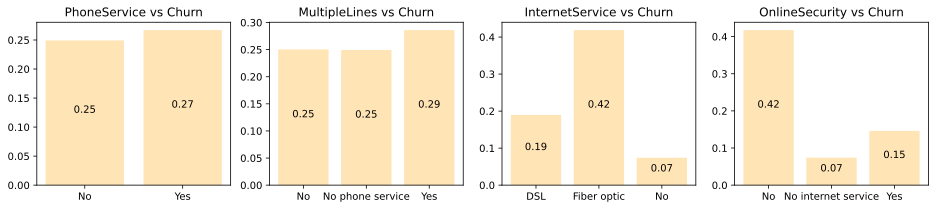

In [16]:
plot_bar_categories(['PhoneService','MultipleLines','InternetService','OnlineSecurity'])

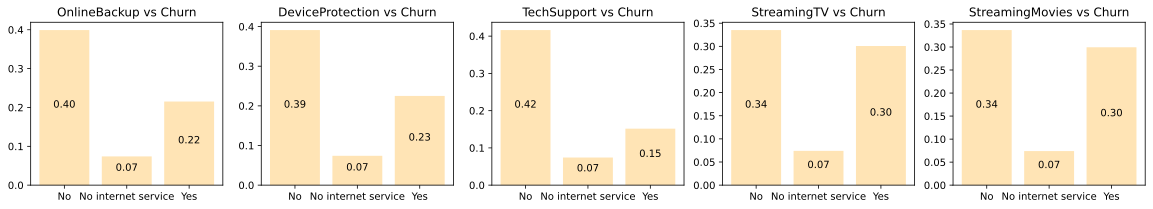

In [17]:
plot_bar_categories(['OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies'])

**Interpretation** :
- Customer who have Fiber Optic internet service are more likely to churn
- Customer who don't have additional internet services like OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, and Streaming are more likely to churn
- It seems that the Telco Company need to upgrade their streaming services qualities as the graph shows that customers who have streaming service (both TV and Movies) are also likely to churn

### 3.3 Contract Attributes

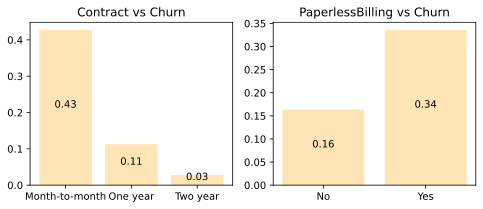

In [18]:
plot_bar_categories(['Contract','PaperlessBilling'])

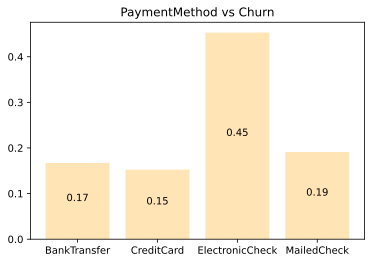

In [19]:
seriess=df.groupby(by='PaymentMethod').Churn.mean()
fig,ax=plt.subplots()
xx=[j for j in range(len(seriess.index))]
yy=[j for j in seriess.values]
x_tiks=[ii for ii in range(len(seriess.index))]
ax.bar(x_tiks,seriess.values,color='moccasin')
ax.set_title('PaymentMethod vs Churn')
ax.set_xticks(x_tiks)
ax.set_xticklabels(['BankTransfer','CreditCard','ElectronicCheck','MailedCheck'])
for xx,yy in zip(xx,yy):
    label = "{:.2f}".format(yy)
    ax.annotate(label,(xx,yy*0.5),ha='center')
fig.set_size_inches(6,4)
fig.set_dpi(50)

**Interpretation** :
- Customer with Month-to-Month contract and Paperless Billing are likely to churn
- Customer who have Electronic Check Payment Method are also likely to churn compared to other methods

### 3.4 Numerical Data Explanatory

DEA will be done for numerical variables such as MonthlyCharges, TotalCharges, and tenure

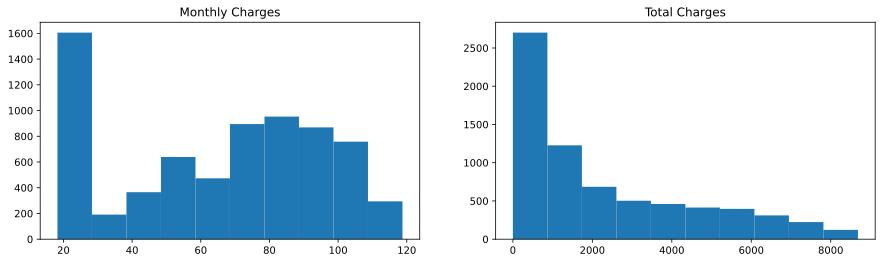

In [20]:
fig,ax=plt.subplots(1,2)
ax[0].hist(df.MonthlyCharges)
ax[0].set_title('Monthly Charges')
ax[1].hist(df.TotalCharges)
ax[1].set_title('Total Charges')
fig.set_size_inches(15,4) 
plt.show()
#Plot the histogram

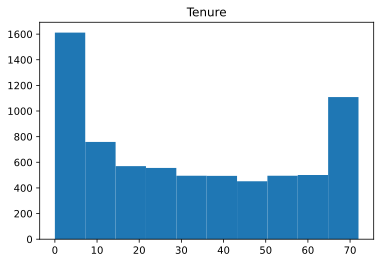

In [21]:
fig,ax=plt.subplots()
ax.hist(df.tenure)
ax.set_title('Tenure')
fig.set_size_inches(6,4) 
plt.show()
#Plot the histogram

**Interpretation of the histogram** :
- As expected, the value distribution of TotalCharges, MonthlyCharges and tenure aren't normal.
- There are 2 peaks in tenure histogram, indicating that there are 2 extreme kinds of people among the customer, one is people with < 10 month tenure, and the latter is >  65 month tenure.
- It seems that the data must be investigated more deeply as histograms do not provide much useful information.

We will dig the data more deeply by binning the quantitative variables such as tenure and MonthlyCharges.

In [22]:
df1=df.copy() 
df1['new_tenure']=pd.qcut(df1['tenure'],q=6) #6 interval #tenure binning

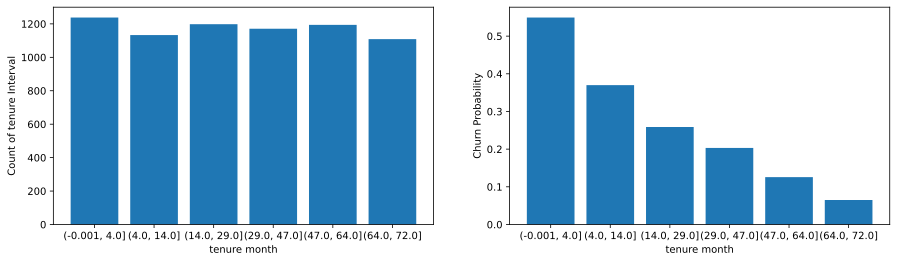

In [23]:
seriess1=df1.groupby(by='new_tenure').Churn.count()
seriess2=df1.groupby(by='new_tenure').Churn.mean()
fig,ax=plt.subplots(1,2)
xtiks=[ii for ii in range(len(seriess1))]
ax[0].bar(xtiks,seriess1.values)
ax[0].set_xticks(xtiks)
ax[0].set_xticklabels(seriess1.index)
ax[0].set_ylabel('Count of tenure Interval')
ax[0].set_xlabel('tenure month')
ax[1].bar(xtiks,seriess2.values)
ax[1].set_xticks(xtiks)
ax[1].set_xticklabels(seriess2.index)
ax[1].set_ylabel('Churn Probability')
ax[1].set_xlabel('tenure month')
fig.set_size_inches(15,4) #The -0.001 appears because the interval use left ( -> meaning that the data actually start from 0

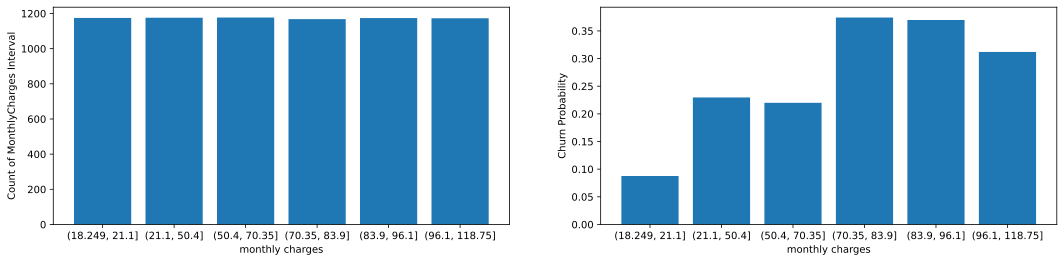

In [24]:
df1['new_MonthlyCharges']=pd.qcut(df1['MonthlyCharges'],q=6) #MonthlyCharges
df1.new_MonthlyCharges
seriess1=df1.groupby(by='new_MonthlyCharges').Churn.count()
seriess2=df1.groupby(by='new_MonthlyCharges').Churn.mean()
fig,ax=plt.subplots(1,2)
xtiks=[ii for ii in range(len(seriess1))]
ax[0].bar(xtiks,seriess1.values)
ax[0].set_xticks(xtiks)
ax[0].set_xticklabels(seriess1.index)
ax[0].set_ylabel('Count of MonthlyCharges Interval')
ax[0].set_xlabel('monthly charges')
ax[1].bar(xtiks,seriess2.values)
ax[1].set_xticks(xtiks)
ax[1].set_xticklabels(seriess2.index)
ax[1].set_ylabel('Churn Probability')
ax[1].set_xlabel('monthly charges')
fig.set_size_inches(18,4) 

**Interpretation of the binning results** :
- More than 50 percent of customer who subscribed for less than 4 months decided to stop. Reasons for this high rate can be bad first experiences and trial period. The tenure binning graph also shows intuitive results considering the churn probability becomes smaller as the tenure period go higher. 
- The MonthlyCharges graph shows almost 17% of our customer have Monthly Charges below 21.1 \$, indicating that many of Telco customers only subscribe for Phone services. The satisfaction of this only service however seems good because the customers are less likely to churn.
- Customers with higher montly charges, i.e 70.35-118.8 \$ are more likely to churn.

## 4. Data Cleansing and Preparation II

Data cleansing and data scanning are very common to be performed interchangeably. That's why after DEA is finished, we are going back into Data Cleansing and Preparation to make our data more ready to be processed by ML algorithm. In this section, we will do Label Encoding and Standardization for numerical data.

### 4.1 Label Encoding

In [25]:
df['SeniorCitizen']=df['SeniorCitizen'].apply(lambda x : 'Yes' if x==1 else 'No')  

In [26]:
df=pd.get_dummies(df)
df

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,0,0,1,1,0,0,1,...,1,0,1,0,0,1,0,0,0,1
7039,72,103.20,7362.90,0,1,0,1,0,0,1,...,1,0,1,0,0,1,0,1,0,0
7040,11,29.60,346.45,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
7041,4,74.40,306.60,1,0,1,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1


Please note that we don't encode Churn into 2 columns because **Churn is the target variable** (Churn is the variable that we want to predict). Instead, we just change the Yes/No values to 1/0 and keep it in 1 column. Aside from tenure, MonthlyCharges, TotalCharges and churn, all variables are considered categorical thus need to be encoded.

### 4.2 Data Scaling

Data Scaling is very important to be done in this dataset since the values (or variance) of total Charges are very big compared to tenure and MonthlyCharges. Of course, we do not want our ML algorithm to be biassed toward this TotalCharges feature. Thus, we will apply Standardization to make the scale or variance of tenure, MonthlyCharges, and TotalCharges values become closer ( $\mu = 0$ & $\sigma = 1$ ). To do this, StandardScaler from sklearn library will be imported.

**Disclaimer** : Standardization might be not the best method to be applied because there still other methods such as Normalization, Robust Scaler, etc that can be used to analyze this dataset. However, the author believes it needs some iterations to determine which one is the best  since it also depends on the applied ML algorithm. 

**Formula of Standardization** :
$$Z = \frac{x-\mu}{\sigma}$$

In [27]:
from sklearn.preprocessing import StandardScaler #We use sklearn library to do Normalization

In [28]:
df[['tenure','MonthlyCharges','TotalCharges']].describe() #Before Standardization

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [29]:
standard_scaler=StandardScaler()
df[['tenure','MonthlyCharges','TotalCharges']] = standard_scaler.fit_transform(df[['tenure','MonthlyCharges','TotalCharges']])

In [30]:
df[['tenure','MonthlyCharges','TotalCharges']].describe() #After Standardization

,tenure,MonthlyCharges,TotalCharges
count,7.043000e+03,7.043000e+03,7.043000e+03
mean,-2.421273e-17,-6.406285e-17,-3.783239e-17
std,1.000071e+00,1.000071e+00,1.000071e+00
min,-1.318165e+00,-1.545860e+00,-1.005780e+00
25%,-9.516817e-01,-9.725399e-01,-8.299464e-01
50%,-1.372744e-01,1.857327e-01,-3.905282e-01
75%,9.214551e-01,8.338335e-01,6.648034e-01
max,1.613701e+00,1.794352e+00,2.825806e+00


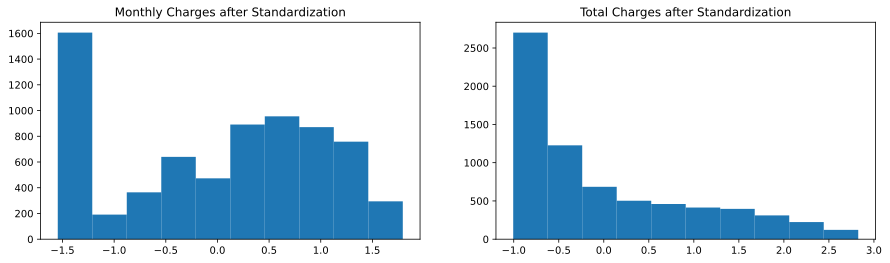

In [31]:
fig,ax=plt.subplots(1,2)
ax[0].hist(df.MonthlyCharges)
ax[0].set_title('Monthly Charges after Standardization')
ax[1].hist(df.TotalCharges)
ax[1].set_title('Total Charges after Standardization')
fig.set_size_inches(15,4) 
plt.show()
#Plot the histogram 

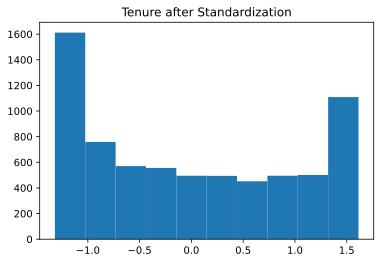

In [32]:
fig,ax=plt.subplots()
ax.hist(df.tenure)
ax.set_title('Tenure after Standardization')
fig.set_size_inches(6,4) 
plt.show()
#Plot the histogram

**After standardization is done, we can clearly see from the histogram and describe table that the mean of numerical variables become 0 and standard deviation become 1.**

In [33]:
df.to_csv('D:\\Learning_python\\result_hw11_indra.csv',index=False) #Save data into csv. format file
df #Data is ready to be processed by ML algorithm

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-1.277445,-1.160323,-0.992611,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,0.066327,-0.259629,-0.172165,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,-1.236724,-0.362660,-0.958066,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0.514251,-0.746535,-0.193672,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,-1.236724,0.197365,-0.938874,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,-0.340876,0.665992,-0.127605,0,0,1,1,0,0,1,...,1,0,1,0,0,1,0,0,0,1
7039,1.613701,1.277533,2.242606,0,1,0,1,0,0,1,...,1,0,1,0,0,1,0,1,0,0
7040,-0.870241,-1.168632,-0.852932,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
7041,-1.155283,0.320338,-0.870513,1,0,1,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1


## 5. Future Works and Recommendations
- Now our data is ready to be processed by ML Algorithms.
- Merging some categorical values, e.g.: No and No Internet Service is quite interesting to do and analyze if it will greatly improve our prediction.
- Other Scaling Method such as MinMaxScaler, Robust Scaler, etc can be tried to determine the one that best suits our ML algorithm and gives the best precision.
- Instead of Scaling, Binning or Discretizing can also be applied on numerical variables to see if it will improve the prediction results. Some useful informations in DEA are obtained through this discretizing method.